### Tikhonov-Regularisierung
Die Regularisierungsfunktion ist λ * I, wobei I die Identitätsmatrix und λ der Regularisierungsparameter ist. Der Regularisierungsparameter λ steuert die Stärke der Regularisierung: Ein hoher Wert von λ führt zu stärkerer Regularisierung und kleineren Gewichten, während ein niedriger Wert von λ zu weniger Regularisierung und potenziell größeren Gewichten führt.

Die Auswahl von λ ist entscheidend für die Effektivität der Regularisierung. Wenn λ zu klein ist, wird die Regularisierung ineffektiv sein und das Modell kann überanpassen. Wenn λ zu groß ist, kann das Modell unteranpassen, da die Regularisierung zu stark ist und die Gewichte zu stark schrumpft. In der Praxis wird λ oft durch Kreuzvalidierung ausgewählt.

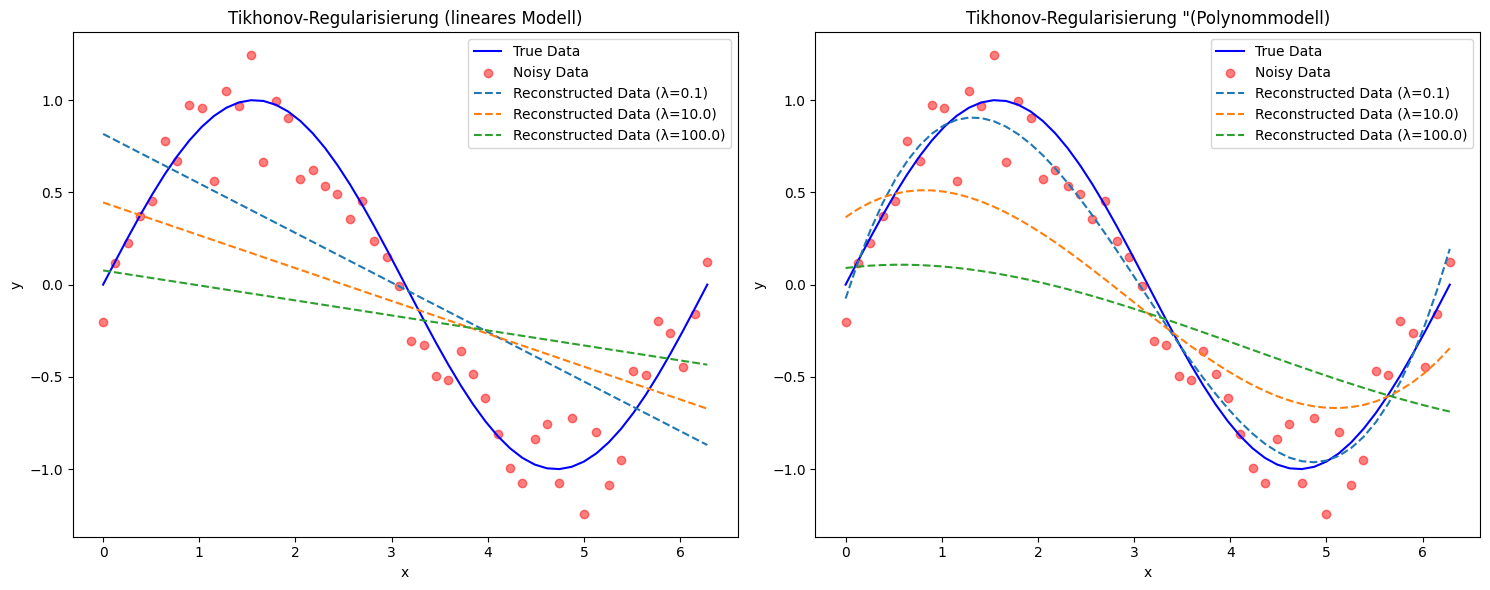

In [12]:
import numpy as np
from scipy.linalg import inv
import matplotlib.pyplot as plt

def tikhonov_regularization(A, y_noisy, lambdas):
    I = np.identity(A.shape[1])
    thetas = [inv(A.T @ A + lmbda * I) @ A.T @ y_noisy for lmbda in lambdas]
    return [A @ theta for theta in thetas]

def plot_results(x_true, y_true, y_noisy, y_reconstructed, lambdas, subplot_idx, title):
    plt.subplot(1, 2, subplot_idx)
    plt.plot(x_true, y_true, label='True Data', color='blue')
    plt.scatter(x_true, y_noisy, label='Noisy Data', color='red', alpha=0.5)
    for y_rec, lmbda in zip(y_reconstructed, lambdas):
        plt.plot(x_true, y_rec, label=f'Reconstructed Data (λ={lmbda})', linestyle='--')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(title)

# Daten
x_true = np.linspace(0, 2 * np.pi, 50)
y_true = np.sin(x_true)
y_noisy = y_true + 0.2 * np.random.randn(len(y_true))

lambdas = [0.1, 10.0, 100.0]
design_matrices = [np.vstack([x_true, np.ones(len(x_true))]).T, np.vstack([x_true**3, x_true**2, x_true, np.ones(len(x_true))]).T]
titles = ['Tikhonov-Regularisierung (lineares Modell)', 'Tikhonov-Regularisierung "(Polynommodell)']

plt.figure(figsize=(15,6))

for i, (A, title) in enumerate(zip(design_matrices, titles), start=1):
    y_reconstructed = tikhonov_regularization(A, y_noisy, lambdas)
    plot_results(x_true, y_true, y_noisy, y_reconstructed, lambdas, i, title)

plt.tight_layout()
plt.show()